In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
target_feature = "Shirt"


epochs = 50


model_id = 0

In [7]:
from PIL import Image


def validate_image(row):
    filepath = row["filepath"]
    try:
        # Try to open the image file
        with Image.open(filepath) as img:
            img.verify()  # Check if the file is a valid image
        return True
    except (IOError, OSError):
        # If the image is not valid, return False
        return False

In [11]:
# Load the CSV file
csv_file = "./processed.csv"
df = pd.read_csv(csv_file)

# Base directory where the images are stored
image_dir = "./clothes_data"

# Add the full path to each image
df["filepath"] = df["照片 Picture"].apply(lambda x: os.path.join(image_dir, f"{x}"))
print(df["filepath"])

# remove invalid datas
df = df[df.apply(validate_image, axis=1)].reset_index(drop=True)

df["result"] = df[target_feature]

print(df["result"])

0       ./clothes_data\image_00000.jpg
1       ./clothes_data\image_00001.jpg
2       ./clothes_data\image_00002.jpg
3       ./clothes_data\image_00003.jpg
4       ./clothes_data\image_00004.jpg
                     ...              
1408    ./clothes_data\image_01408.jpg
1409    ./clothes_data\image_01409.jpg
1410    ./clothes_data\image_01410.jpg
1411    ./clothes_data\image_01411.jpg
1412    ./clothes_data\image_01412.jpg
Name: filepath, Length: 1413, dtype: object
0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
783    0.0
784    0.0
785    0.0
786    0.0
787    0.0
Name: result, Length: 788, dtype: float64


In [12]:
img_height, img_width = 180, 180


def load_and_preprocess_image(filepath):
    img = load_img(filepath, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return img_array

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataframe into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract features and labels
train_images = np.array([load_and_preprocess_image(fp) for fp in train_df["filepath"]])
train_labels = train_df["result"].values

val_images = np.array([load_and_preprocess_image(fp) for fp in val_df["filepath"]])
val_labels = val_df["result"].values

In [14]:
model = models.Sequential(
    [
        layers.Input(shape=(img_height, img_width, 3)),
        layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid"),  # Sigmoid for binary classification
    ]
)

C:\Users\doo12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_images, train_labels, validation_data=(val_images, val_labels), epochs=epochs
)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 332ms/step - accuracy: 0.7990 - loss: 0.6658 - val_accuracy: 0.7788 - val_loss: 0.5570
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 297ms/step - accuracy: 0.8204 - loss: 0.4400 - val_accuracy: 0.7885 - val_loss: 0.4318
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.8338 - loss: 0.4031 - val_accuracy: 0.7837 - val_loss: 0.3974
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.8387 - loss: 0.3539 - val_accuracy: 0.7933 - val_loss: 0.3626
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - accuracy: 0.8851 - loss: 0.3070 - val_accuracy: 0.8221 - val_loss: 0.3897
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.8808 - loss: 0.2895 - val_accuracy: 0.8173 - val_loss: 0.3900
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - accuracy: 0.9122 - loss: 0.2192 - val_accuracy: 0.8413 - val_loss: 0.3680
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.9194 - loss: 0.2054 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8823 - loss: 1.0686
Validation Accuracy: 0.87


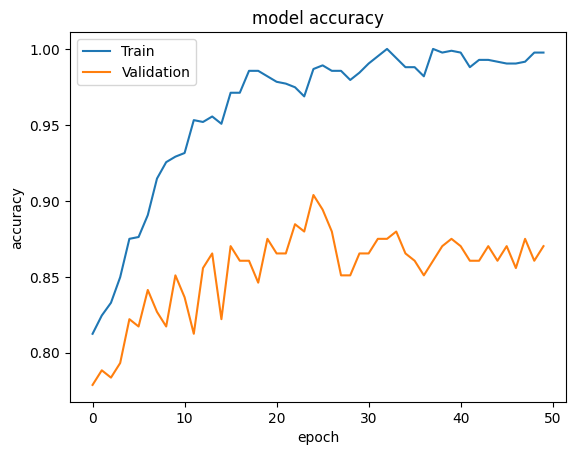

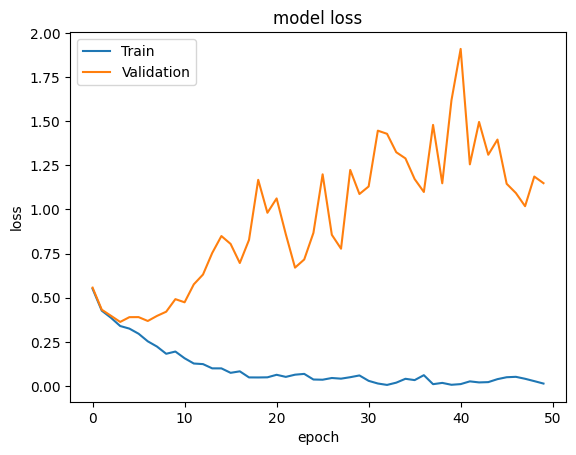

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
# summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
model_folder = "models"
name = "model_" + target_feature + "_" + str(model_id) + ".keras"
model.save(os.path.join(model_folder, name))